In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Added new cell to test pushing to a new git branch

In [2]:
pg_df = pd.read_csv('pg_stats.csv', index_col = 0)
pg_df = pg_df.drop(['Pos','Tm'], axis=1)
pg_df = pg_df.dropna(how='any')
pg_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joe Young,24,33,0,135,6.9,19.2,0.361,1.3,6.1,0.217,...,0.733,0.3,4.3,4.5,4.0,1.1,0.0,1.3,1.3,18.1
Delon Wright,24,27,0,446,4.0,9.4,0.422,0.8,2.4,0.333,...,0.764,1.3,2.6,3.9,4.6,2.2,0.9,2.0,2.5,12.1
Deron Williams,32,64,44,1657,5.7,13.0,0.438,1.8,5.1,0.363,...,0.826,0.3,2.9,3.2,7.8,0.7,0.2,3.0,3.0,15.2
Isaiah Whitehead,21,73,26,1643,4.5,11.1,0.402,1.0,3.3,0.295,...,0.805,0.7,3.3,4.0,4.2,0.9,0.8,3.1,3.8,11.9
Russell Westbrook,28,81,81,2802,10.6,24.9,0.425,2.6,7.5,0.343,...,0.845,1.8,9.3,11.1,10.8,1.7,0.4,5.6,2.4,32.9
Briante Weber,24,20,0,205,4.4,10.5,0.417,0.2,1.8,0.100,...,0.688,1.4,3.2,4.6,3.7,2.1,0.2,1.4,2.8,10.9
C.J. Watson,32,62,9,1012,3.4,8.8,0.387,1.1,3.7,0.305,...,0.864,0.6,2.6,3.2,4.1,1.5,0.1,1.7,3.0,10.0
John Wall,26,78,78,2836,8.2,18.2,0.451,1.1,3.5,0.327,...,0.801,0.7,3.4,4.1,10.5,2.0,0.6,4.1,1.9,22.9
Kemba Walker,26,79,79,2739,8.5,19.0,0.444,3.2,7.9,0.399,...,0.847,0.6,3.5,4.0,5.7,1.1,0.3,2.2,1.6,24.1


In [3]:
pca = PCA(copy=True, n_components=2, whiten=False)
pca.fit(pg_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
pg_2d = pca.transform(pg_df)
pg_2d_df = pd.DataFrame(pg_2d)
pg_2d_df.index = pg_df.index
pg_2d_df.columns = ['PC1','PC2']
pg_2d_df.head()

,PC1,PC2
Player,,
Joe Young,-1135.414619,-4.262018
Delon Wright,-824.843565,-2.802065
Deron Williams,387.475356,-4.689226
Isaiah Whitehead,373.151937,15.581977
Russell Westbrook,1533.267614,-17.900308


In [5]:
print(pca.explained_variance_ratio_) 

[  9.99443303e-01   3.90012407e-04]


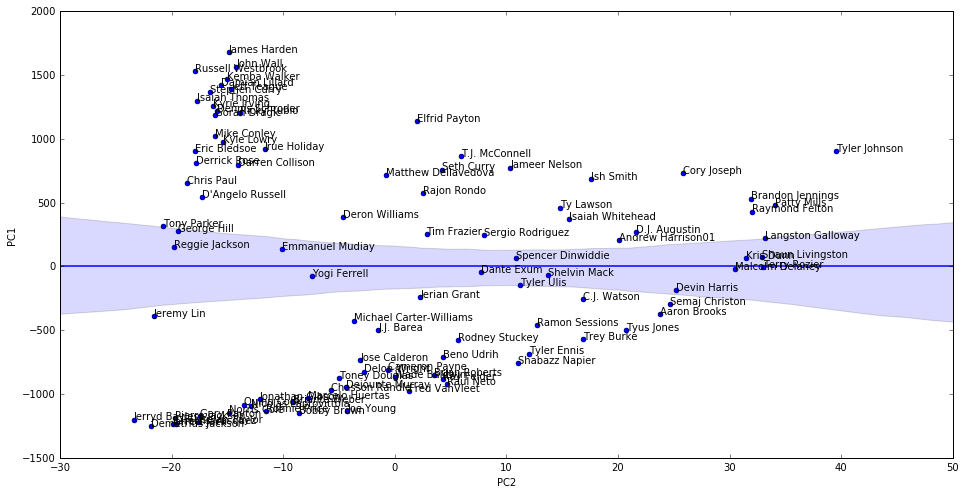

In [19]:
%matplotlib inline
    
ax = pg_2d_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(pg_df.index):
    ax.annotate(
        country, 
        (pg_2d_df.iloc[i].PC2, pg_2d_df.iloc[i].PC1)
    )
sns.regplot(ax=ax, data=pg_2d_df, x='PC2', y='PC1')

### K-means

In [7]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(pg_df)

In [8]:
pg_2d_df['cluster'] = pd.Series(clusters.labels_, index=pg_2d_df.index)

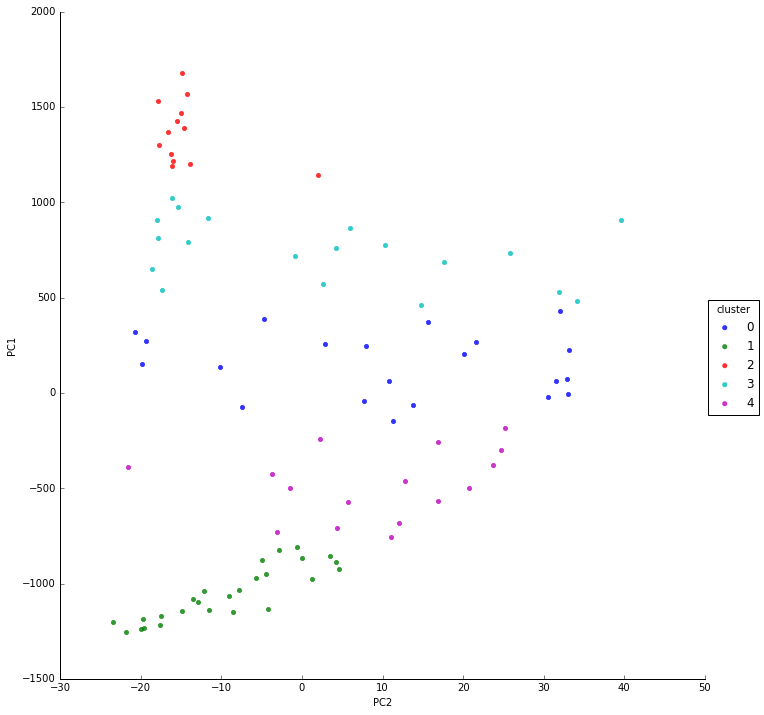

In [9]:
# ax1 = pg_2d_df.plot(
#         kind='scatter',
#         x='PC2',y='PC1',
#         c=pg_2d_df.cluster.astype(np.float), 
#         figsize=(16,8))

g = sns.lmplot(x="PC2", y="PC1", hue="cluster", data=pg_2d_df, size = 10, fit_reg=False)

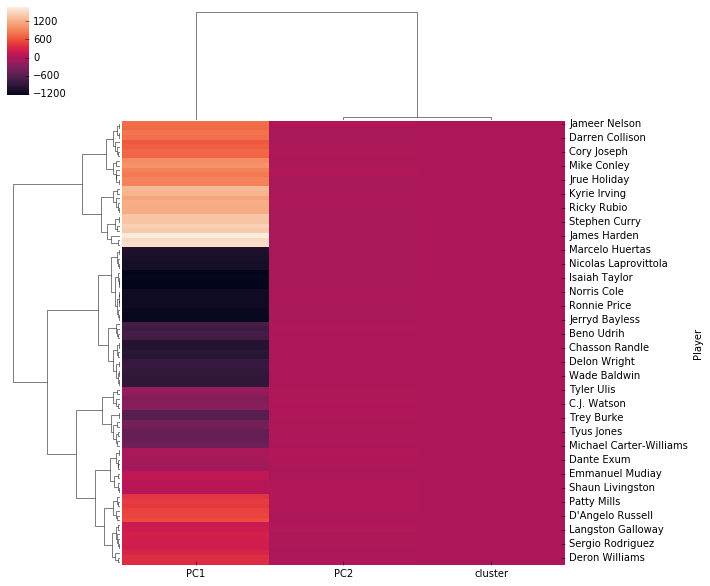

In [10]:
x = sns.clustermap(data=pg_2d_df)

In [11]:
# fig1 = g.getfig
g.savefig('plot1.png')
# fig2 = x.getfig
x.savefig('plot1.png')

In [12]:
sorted_df = pg_2d_df.sort('cluster')
sorted_df.to_csv('clustered_pg.csv', sep='\t', encoding='utf-8')

/Users/hari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [13]:
sorted_df


,PC1,PC2,cluster
Player,,,
D.J. Augustin,268.187528,21.649032,0
Emmanuel Mudiay,136.357510,-10.133766,0
Shelvin Mack,-65.452037,13.723997,0
Shaun Livingston,74.758545,32.870169,0
Reggie Jackson,154.561396,-19.828186,0
Sergio Rodriguez,248.248995,7.969829,0
Terry Rozier,-7.305626,32.951967,0
George Hill,274.363193,-19.394315,0
Andrew Harrison01,204.003646,20.083450,0


In [14]:
x = sorted_df.where(sorted_df['cluster'] == 1)
x = x.dropna([0,1], 'any')
elite = x.join(pg_df).drop(['PC1', 'PC2', 'cluster'],axis=1)
elite






,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Jerryd Bayless,28,3,1,71,5.6,16.2,0.344,1.0,2.5,0.400,...,0.900,1.5,4.6,6.1,6.6,0.0,0.0,4.6,2.0,16.7
Wade Baldwin,20,33,1,405,3.2,10.2,0.313,0.3,2.0,0.136,...,0.838,1.0,3.1,4.1,5.4,1.6,0.6,3.5,3.6,9.4
Bobby Brown,32,25,0,123,6.7,17.6,0.383,4.1,10.2,0.400,...,1.000,0.0,1.8,1.8,4.1,0.3,0.0,1.5,1.5,18.1
Pierre Jackson,25,8,1,84,5.6,16.7,0.333,1.3,4.7,0.273,...,0.857,0.4,3.4,3.9,8.1,0.9,0.0,1.3,2.1,15.0
Kay Felder,21,42,0,386,5.8,14.7,0.392,0.7,2.1,0.318,...,0.714,0.3,3.5,3.8,5.4,1.7,0.7,2.8,3.5,15.5
Demetrius Jackson,22,5,0,17,6.4,8.5,0.750,2.1,2.1,1.000,...,0.500,4.2,4.2,8.5,6.4,0.0,0.0,0.0,0.0,21.2
Quinn Cook,23,14,0,188,6.3,12.6,0.500,2.1,5.0,0.423,...,0.400,0.2,1.1,1.3,5.0,0.8,0.0,2.5,2.5,15.1
Marcelo Huertas,33,23,1,237,3.8,10.3,0.368,0.6,2.9,0.211,...,0.529,0.3,3.3,3.6,7.9,1.5,0.3,2.9,2.4,9.6
Jonathan Gibson,29,17,0,231,5.5,14.8,0.368,2.3,7.0,0.333,...,0.724,0.2,3.3,3.4,4.1,1.2,0.0,3.3,3.3,16.5


In [15]:
pca2 = PCA(copy=True, n_components=2, whiten=False)
pca2.fit(elite)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
elite_2d = pca2.transform(elite)
elite_2d_df = pd.DataFrame(elite_2d)
elite_2d_df.index = elite.index
elite_2d_df.columns = ['PC1','PC2']
elite_2d_df.head()

,PC1,PC2
Player,,
Jerryd Bayless,-149.776643,1.232154
Wade Baldwin,185.513786,-3.777930
Bobby Brown,-96.291978,13.433851
Pierre Jackson,-136.418726,3.446885
Kay Felder,167.313838,9.917338


In [17]:
kmeans = KMeans(n_clusters=2)
clusters2 = kmeans.fit(elite)
elite_2d_df['cluster'] = pd.Series(clusters2.labels_, index=elite.index)
elite_2d_df.sort('cluster')

/Users/hari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,PC1,PC2,cluster
Player,,,
Jerryd Bayless,-149.776643,1.232154,0
Briante Weber,-14.904380,-0.296221,0
Gary Payton,-121.692741,-7.777689,0
Ronnie Price,-86.305386,-8.462410,0
Isaiah Taylor,-168.740073,-10.556659,0
Greivis Vasquez,-181.819080,-8.248268,0
Nicolas Laprovittola,-46.006778,-1.193287,0
Joe Young,-83.606441,22.258193,0
Norris Cole,-95.196290,1.695306,0


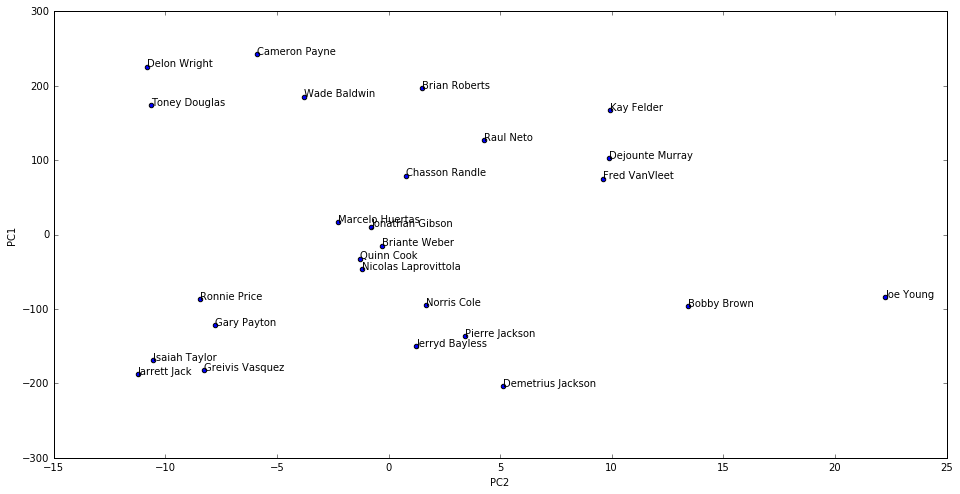

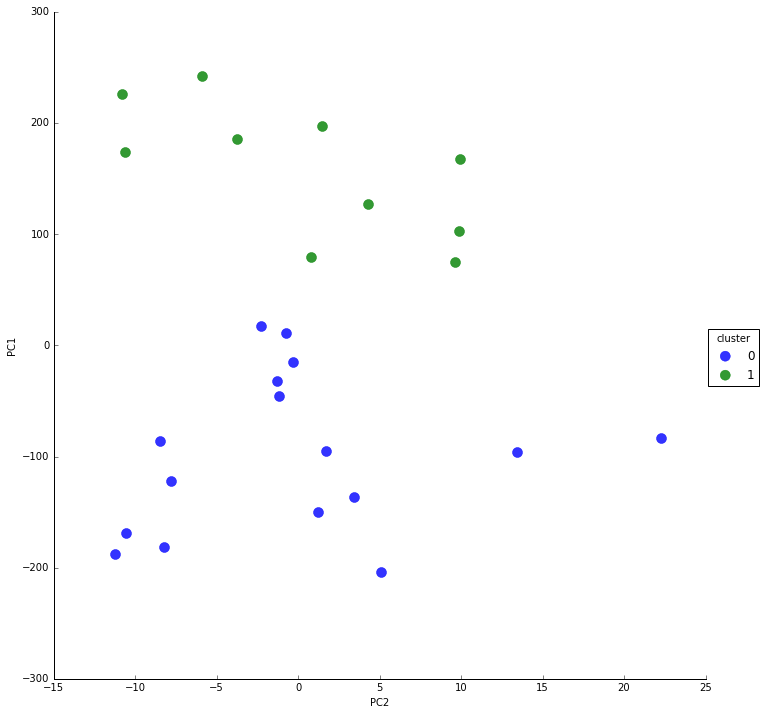

In [18]:
%matplotlib inline
    
ax = elite_2d_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    

g = sns.lmplot(x="PC2", y="PC1", hue="cluster", data=elite_2d_df, size = 10, fit_reg=False, scatter_kws={"s": 100})
for i, country in enumerate(elite.index):
    ax.annotate(
        country, 
        (elite_2d_df.iloc[i].PC2, elite_2d_df.iloc[i].PC1)
    )

In [66]:
kmeans = KMeans(n_clusters=2)
clusters2 = kmeans.fit(elite)
elite['cluster'] = pd.Series(clusters2.labels_, index=elite.index)
elite.sort('cluster')

/Users/hari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
Player,,,,,,,,,,,,,,,,,,,,,
Russell Westbrook,28,81,81,2802,10.6,24.9,0.425,2.6,7.5,0.343,...,1.8,9.3,11.1,10.8,1.7,0.4,5.6,2.4,32.9,0
John Wall,26,78,78,2836,8.2,18.2,0.451,1.1,3.5,0.327,...,0.7,3.4,4.1,10.5,2.0,0.6,4.1,1.9,22.9,0
Kemba Walker,26,79,79,2739,8.5,19.0,0.444,3.2,7.9,0.399,...,0.6,3.5,4.0,5.7,1.1,0.3,2.2,1.6,24.1,0
James Harden,27,81,81,2947,8.2,18.7,0.440,3.2,9.2,0.347,...,1.2,6.9,8.1,11.1,1.5,0.5,5.7,2.6,28.8,0
Damian Lillard,26,75,75,2694,8.8,19.9,0.444,2.9,7.7,0.370,...,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2.0,27.0,0
Stephen Curry,28,79,79,2638,9.2,19.7,0.468,4.4,10.8,0.411,...,0.8,4.0,4.8,7.2,1.9,0.2,3.3,2.5,27.3,0
Jeff Teague,28,82,82,2657,5.4,12.3,0.442,1.2,3.4,0.357,...,0.4,4.0,4.5,8.7,1.4,0.4,2.9,2.2,17.0,0
Isaiah Thomas,27,76,76,2569,9.6,20.6,0.463,3.4,9.1,0.379,...,0.6,2.3,2.9,6.3,1.0,0.2,2.9,2.3,30.8,1
Dennis Schroder,23,79,78,2485,7.9,17.6,0.451,1.4,4.3,0.340,...,0.6,3.0,3.6,7.2,1.1,0.2,3.7,2.2,20.5,1
